# Scenario A - Noise Level Variation (multiple runs for init mode)

In this scenario the noise level on a generated dataset is varied in three steps: low/medium/high, 
the rest of the parameters in the dataset is kept constant.

The model used in the inference of the parameters is formulated as follows: 

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}\big] + \epsilon
\end{equation}


This file runs a series of runs for a single sampler init mode. It does not store the traces or plots, only the summary statistics are stored.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Import local utility functions

In [2]:
import datetime
import os
import sys
sys.path.append('../../utils')
import utils as utl
import datagen as dg
import models as mdl
import results as res
import figures as fig

## Local settings

In [3]:
# output for results and images
out_path      = './output_mruns_nopeak_advi_adapt_diag/'
fbase         = 'scenario_noise'
file_basename = out_path + fbase
        
# if dir does not exist, create it
if not os.path.exists(out_path):
    os.makedirs(out_path)

# initialization method for sampler ('jitter+adapt_diag'/'advi+adapt_diag'/'adapt_diag')
init_mode = 'advi+adapt_diag'
    
# provide peak positions to the model as testvalues ('yes'/'no')
peak_info = 'no'

# dataset directory
dataset_dir = './input_datasets'

# number of runs over the dataset
nruns = 3

## Save configuration

In [4]:
fp = open(out_path + 'settings.txt', 'w')
fp.write('start: ' + datetime.datetime.now().strftime("%A, %d. %B %Y %I:%M%p") + '\n')
fp.write('init_mode  = ' + init_mode + '\n')
fp.write('peak_info  = ' + peak_info + '\n')
fp.write('data_dir   = ' + dataset_dir + '\n')
fp.write('nruns      = ' + str(nruns) + '\n')
fp.close()

# Generate data and plot

In [5]:
# list of wavelengths (x-values)
xval = [i for i in range(200, 400, 2)]

ldata  = []
lpeaks = []
nsets  = 10

# noise level is 1%, 2% and 5% of the minimal signal amplitude
noise_levels = [0.05, 0.10, 0.25]

# total number of datasets
tsets = nsets * len(noise_levels)

# load pre-generated datasets from disk
ldata, lpeaks = dg.data_load(tsets, dataset_dir)

In [6]:
# plot datasets
#fig.plot_datasets(ldata, lpeaks, dims=(15,2), figure_size=(12,48), savefig='yes', fname=file_basename)

# Initialize models and run inference

In [7]:
# convert pandas data to numpy arrays
x_val = np.array(xval, dtype='float32')

# store dataset y-values in list
cols = ldata[0].columns
y_val = [ldata[i][cols].values for i in range(len(ldata))]

In [8]:
# initialize models and run inference
models = []
traces = []

for r in range(nruns):
    print("running loop {0}/{1} over datasets".format(r+1,nruns))
    for i in range(len(ldata)):
        if peak_info == 'yes':
            plist = lpeaks[i].flatten()
            plist.sort()
            model_g = mdl.model_gauss(xvalues=x_val, observations=y_val[i], npeaks=3, mu_peaks=plist)
        else:
            model_g = mdl.model_gauss(xvalues=x_val, observations=y_val[i], npeaks=3)
        models.append(model_g)

        with model_g:
            print("({0}:{1}) running inference on dataset #{2}/{3}".format(r+1,nruns,i+1,len(ldata)))
            trace_g = pm.sample(2000, init=init_mode, cores=2)
            traces.append(trace_g)

running loop 1/3 over datasets


Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #1/30


Average Loss = 3,934.6:  11%|█         | 21882/200000 [00:15<02:03, 1437.04it/s]  
Convergence achieved at 22000
Interrupted at 21,999 [10%]: Average Loss = 29,489
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 958 divergences: 100%|██████████| 5000/5000 [00:51<00:00, 98.01draws/s] 
The acceptance probability does not match the target. It is 0.9669672225830463, but should be close to 0.8. Try to increase the number of tuning steps.
There were 958 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.18473080514767357, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #2/30


Average Loss = 4,447.8:  10%|▉         | 19153/200000 [00:11<01:48, 1660.68it/s]  
Convergence achieved at 19300
Interrupted at 19,299 [9%]: Average Loss = 49,890
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 153 divergences: 100%|██████████| 5000/5000 [02:19<00:00, 35.90draws/s] 
There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8995371347836517, but should be close to 0.8. Try to increase the number of tuning steps.
There were 122 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7170342300189948, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameter

(1:3) running inference on dataset #3/30


Average Loss = 3,744:  14%|█▍        | 28512/200000 [00:17<01:47, 1591.96it/s]    
Convergence achieved at 28600
Interrupted at 28,599 [14%]: Average Loss = 19,872
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 3,011 divergences: 100%|██████████| 5000/5000 [01:54<00:00, 43.55draws/s] 
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 1.0964962440616399e-92, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1012 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.1477139245801515, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assignin

(1:3) running inference on dataset #4/30


Average Loss = 4,710.8:  11%|█         | 21894/200000 [00:13<01:50, 1615.06it/s]  
Convergence achieved at 21900
Interrupted at 21,899 [10%]: Average Loss = 81,979
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [04:32<00:00, 18.35draws/s] 
The acceptance probability does not match the target. It is 0.955916108679828, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9974215397211222, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #5/30


Average Loss = 4,678.6:  10%|▉         | 19951/200000 [00:12<01:49, 1645.04it/s]  
Convergence achieved at 20100
Interrupted at 20,099 [10%]: Average Loss = 63,091
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [01:53<00:00, 44.17draws/s] 
The acceptance probability does not match the target. It is 0.9781847211034265, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9898530492884889, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #6/30


Average Loss = 4,263.2:   9%|▉         | 18925/200000 [00:11<01:53, 1590.48it/s]  
Convergence achieved at 19000
Interrupted at 18,999 [9%]: Average Loss = 57,731
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 47 divergences: 100%|██████████| 5000/5000 [06:25<00:00, 12.96draws/s]
There were 47 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9794857479127591, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #7/30


Average Loss = 4,304:  14%|█▍        | 28983/200000 [00:18<01:49, 1564.41it/s]    
Convergence achieved at 29000
Interrupted at 28,999 [14%]: Average Loss = 29,642
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 46 divergences: 100%|██████████| 5000/5000 [03:48<00:00, 21.86draws/s]
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9919035929421792, but should be close to 0.8. Try to increase the number of tuning steps.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9948309075566237, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #8/30


Average Loss = 3,193:  17%|█▋        | 34228/200000 [00:20<01:40, 1651.31it/s]    
Convergence achieved at 34300
Interrupted at 34,299 [17%]: Average Loss = 9,828.8
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 781 divergences: 100%|██████████| 5000/5000 [00:42<00:00, 117.30draws/s]
There were 48 divergences after tuning. Increase `target_accept` or reparameterize.
There were 733 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.13990371528281045, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #9/30


Average Loss = 2,476.6:  24%|██▍       | 48501/200000 [00:30<01:36, 1569.96it/s]  
Convergence achieved at 48600
Interrupted at 48,599 [24%]: Average Loss = 23,771
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 64 divergences: 100%|██████████| 5000/5000 [00:41<00:00, 121.38draws/s]
There were 64 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8905427536382067, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #10/30


Average Loss = 3,567.4:  21%|██▏       | 42966/200000 [00:27<01:40, 1568.25it/s]  
Convergence achieved at 43000
Interrupted at 42,999 [21%]: Average Loss = 19,919
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,999 divergences: 100%|██████████| 5000/5000 [08:21<00:00,  9.96draws/s] 
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6054095929868912, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assig

(1:3) running inference on dataset #11/30


Average Loss = 4,418.2:  12%|█▏        | 24151/200000 [00:15<01:49, 1600.45it/s]  
Convergence achieved at 24200
Interrupted at 24,199 [12%]: Average Loss = 47,990
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [08:03<00:00, 10.34draws/s]
The acceptance probability does not match the target. It is 0.9998508398843176, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9997757546019198, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #12/30


Average Loss = 4,146.3:  13%|█▎        | 26231/200000 [00:17<01:56, 1488.73it/s]  
Convergence achieved at 26300
Interrupted at 26,299 [13%]: Average Loss = 42,545
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:24<00:00, 204.80draws/s]
The acceptance probability does not match the target. It is 0.900549601831749, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #13/30


Average Loss = 4,673.8:   9%|▊         | 17251/200000 [00:11<02:01, 1503.28it/s]  
Convergence achieved at 17400
Interrupted at 17,399 [8%]: Average Loss = 50,976
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 893 divergences: 100%|██████████| 5000/5000 [12:05<00:00,  6.89draws/s] 
There were 276 divergences after tuning. Increase `target_accept` or reparameterize.
There were 617 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4886031811040399, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi

(1:3) running inference on dataset #14/30


Average Loss = 1,257.3:  25%|██▌       | 50131/200000 [00:33<01:41, 1474.88it/s]  
Convergence achieved at 50200
Interrupted at 50,199 [25%]: Average Loss = 21,839
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,999 divergences: 100%|██████████| 5000/5000 [04:38<00:00, 17.95draws/s] 
The acceptance probability does not match the target. It is 0.9932453305130624, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #15/30


Average Loss = 4,255.1:  16%|█▌        | 31430/200000 [00:20<01:50, 1520.29it/s]  
Convergence achieved at 31500
Interrupted at 31,499 [15%]: Average Loss = 33,580
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [02:56<00:00, 28.31draws/s]
The acceptance probability does not match the target. It is 0.9994951840875318, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9994824112342517, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #16/30


Average Loss = 4,429.2:   7%|▋         | 14877/200000 [00:09<01:55, 1598.77it/s]  
Convergence achieved at 14900
Interrupted at 14,899 [7%]: Average Loss = 72,116
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 697 divergences: 100%|██████████| 5000/5000 [00:49<00:00, 101.52draws/s]
There were 697 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.00025833824529124255, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9018942514070326, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #17/30


Average Loss = 3,368.1:  28%|██▊       | 55871/200000 [00:35<01:32, 1566.25it/s]  
Convergence achieved at 55900
Interrupted at 55,899 [27%]: Average Loss = 18,950
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 47 divergences: 100%|██████████| 5000/5000 [01:47<00:00, 46.40draws/s]
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9020548089404918, but should be close to 0.8. Try to increase the number of tuning steps.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #18/30


Average Loss = 4,370.4:  10%|█         | 20058/200000 [00:12<01:51, 1611.58it/s]  
Convergence achieved at 20100
Interrupted at 20,099 [10%]: Average Loss = 53,272
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 18 divergences: 100%|██████████| 5000/5000 [08:30<00:00,  9.79draws/s]
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8814184566835278, but should be close to 0.8. Try to increase the number of tuning steps.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #19/30


Average Loss = 4,135.8:  17%|█▋        | 34851/200000 [00:22<01:45, 1569.98it/s]  
Convergence achieved at 35000
Interrupted at 34,999 [17%]: Average Loss = 36,693
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,646 divergences: 100%|██████████| 5000/5000 [10:14<00:00,  8.14draws/s] 
There were 621 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5387235608556558, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 1025 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.136808007447091, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did n

(1:3) running inference on dataset #20/30


Average Loss = 4,383.6:  13%|█▎        | 26820/200000 [00:17<01:54, 1516.61it/s]  
Convergence achieved at 26900
Interrupted at 26,899 [13%]: Average Loss = 34,601
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,070 divergences: 100%|██████████| 5000/5000 [01:18<00:00, 63.88draws/s] 
There were 141 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6345869051493518, but should be close to 0.8. Try to increase the number of tuning steps.
There were 929 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.12631157789642805, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assign

(1:3) running inference on dataset #21/30


Average Loss = 4,387.6:  11%|█▏        | 22890/200000 [00:14<01:52, 1568.17it/s]  
Convergence achieved at 22900
Interrupted at 22,899 [11%]: Average Loss = 46,429
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 2,178 divergences: 100%|██████████| 5000/5000 [03:27<00:00, 24.10draws/s] 
There were 179 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.33544474586606965, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
I

(1:3) running inference on dataset #22/30


Average Loss = 4,623.5:  13%|█▎        | 25281/200000 [00:16<01:51, 1564.92it/s]  
Convergence achieved at 25300
Interrupted at 25,299 [12%]: Average Loss = 34,649
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 242 divergences: 100%|██████████| 5000/5000 [00:42<00:00, 117.88draws/s]
There were 49 divergences after tuning. Increase `target_accept` or reparameterize.
There were 192 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #23/30


Average Loss = 3,963.6:  13%|█▎        | 25893/200000 [00:15<01:45, 1647.70it/s]  
Convergence achieved at 26000
Interrupted at 25,999 [12%]: Average Loss = 33,270
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 69 divergences: 100%|██████████| 5000/5000 [14:37<00:00,  5.70draws/s]
There were 36 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 33 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #24/30


Average Loss = 4,038.7:  17%|█▋        | 34482/200000 [00:21<01:44, 1582.93it/s]  
Convergence achieved at 34500
Interrupted at 34,499 [17%]: Average Loss = 26,867
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [01:04<00:00, 77.80draws/s] 
The acceptance probability does not match the target. It is 0.9846438077758441, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #25/30


Average Loss = 5,041.9:  12%|█▏        | 23491/200000 [00:15<01:54, 1544.25it/s]  
Convergence achieved at 23600
Interrupted at 23,599 [11%]: Average Loss = 1.075e+05
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,972 divergences: 100%|██████████| 5000/5000 [00:57<00:00, 86.39draws/s] 
There were 1927 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.01047659797675688, but should be close to 0.8. Try to increase the number of tuning steps.
There were 45 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #26/30


Average Loss = 4,252.9:   7%|▋         | 14255/200000 [00:09<01:58, 1572.45it/s]  
Convergence achieved at 14300
Interrupted at 14,299 [7%]: Average Loss = 38,073
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 191 divergences: 100%|██████████| 5000/5000 [01:07<00:00, 73.81draws/s] 
There were 104 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9135499050787221, but should be close to 0.8. Try to increase the number of tuning steps.
There were 87 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #27/30


Average Loss = 4,521.5:  18%|█▊        | 36231/200000 [00:23<01:46, 1544.75it/s]  
Convergence achieved at 36300
Interrupted at 36,299 [18%]: Average Loss = 41,023
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 141 divergences: 100%|██████████| 5000/5000 [00:37<00:00, 134.12draws/s]
There were 87 divergences after tuning. Increase `target_accept` or reparameterize.
There were 54 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #28/30


Average Loss = 3,346.7:  24%|██▍       | 48289/200000 [00:30<01:36, 1565.08it/s]  
Convergence achieved at 48300
Interrupted at 48,299 [24%]: Average Loss = 21,155
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,999 divergences: 100%|██████████| 5000/5000 [02:25<00:00, 34.47draws/s] 
The acceptance probability does not match the target. It is 0.9945371668408339, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #29/30


Average Loss = 4,214.6:   7%|▋         | 14245/200000 [00:09<02:04, 1495.22it/s]  
Convergence achieved at 14300
Interrupted at 14,299 [7%]: Average Loss = 59,610
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:34<00:00, 146.06draws/s]
The acceptance probability does not match the target. It is 0.9179225578214497, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8873910337798601, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(1:3) running inference on dataset #30/30


Average Loss = 4,281.5:   8%|▊         | 15781/200000 [00:09<01:54, 1612.17it/s]  
Convergence achieved at 15800
Interrupted at 15,799 [7%]: Average Loss = 45,473
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:41<00:00, 120.64draws/s]
The acceptance probability does not match the target. It is 0.8861922996144058, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.960198416217726, but should be close to 0.8. Try to increase the number of tuning steps.


running loop 2/3 over datasets


Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #1/30


Average Loss = 3,928.6:  11%|█         | 22354/200000 [00:15<02:02, 1451.32it/s]  
Convergence achieved at 22400
Interrupted at 22,399 [11%]: Average Loss = 37,193
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [03:23<00:00, 24.61draws/s] 
The acceptance probability does not match the target. It is 0.9769314527546037, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9992549422068596, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #2/30


Average Loss = 4,462.4:   8%|▊         | 16811/200000 [00:10<01:57, 1559.47it/s]  
Convergence achieved at 16900
Interrupted at 16,899 [8%]: Average Loss = 54,270
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 110 divergences: 100%|██████████| 5000/5000 [13:39<00:00,  6.10draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9512877231860561, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 108 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adap

(2:3) running inference on dataset #3/30


Average Loss = 3,762.9:  12%|█▏        | 24163/200000 [00:15<01:56, 1511.94it/s]  
Convergence achieved at 24300
Interrupted at 24,299 [12%]: Average Loss = 22,454
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 2,551 divergences: 100%|██████████| 5000/5000 [01:07<00:00, 74.35draws/s] 
There were 552 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6473533305207242, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
In

(2:3) running inference on dataset #4/30


Average Loss = 4,709.6:  12%|█▏        | 24421/200000 [00:15<01:51, 1568.11it/s]  
Convergence achieved at 24500
Interrupted at 24,499 [12%]: Average Loss = 46,389
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1 divergences: 100%|██████████| 5000/5000 [01:07<00:00, 74.54draws/s] 
The acceptance probability does not match the target. It is 0.992955590385262, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #5/30


Average Loss = 4,661.4:  15%|█▌        | 30651/200000 [00:20<01:51, 1515.88it/s]  
Convergence achieved at 30800
Interrupted at 30,799 [15%]: Average Loss = 40,698
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 222 divergences: 100%|██████████| 5000/5000 [00:43<00:00, 115.40draws/s]
There were 118 divergences after tuning. Increase `target_accept` or reparameterize.
There were 104 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #6/30


Average Loss = 4,268.1:   9%|▉         | 17791/200000 [00:11<01:55, 1575.41it/s]  
Convergence achieved at 17800
Interrupted at 17,799 [8%]: Average Loss = 51,746
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [01:42<00:00, 48.85draws/s] 
The acceptance probability does not match the target. It is 0.9836011161902778, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9716334093251088, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #7/30


Average Loss = 4,309.1:  14%|█▍        | 28861/200000 [00:19<01:54, 1494.81it/s]  
Convergence achieved at 28900
Interrupted at 28,899 [14%]: Average Loss = 26,917
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 198 divergences: 100%|██████████| 5000/5000 [01:35<00:00, 52.34draws/s] 
There were 84 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9111589712408649, but should be close to 0.8. Try to increase the number of tuning steps.
There were 114 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #8/30


Average Loss = 3,189:  17%|█▋        | 33917/200000 [00:21<01:47, 1551.03it/s]    
Convergence achieved at 34000
Interrupted at 33,999 [16%]: Average Loss = 9,327.5
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 504 divergences: 100%|██████████| 5000/5000 [00:39<00:00, 126.43draws/s]
There were 463 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6571887209989211, but should be close to 0.8. Try to increase the number of tuning steps.
There were 40 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #9/30


Average Loss = 2,652.7:  18%|█▊        | 35270/200000 [00:23<01:47, 1528.82it/s]  
Convergence achieved at 35400
Interrupted at 35,399 [17%]: Average Loss = 30,746
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 137 divergences: 100%|██████████| 5000/5000 [00:40<00:00, 123.91draws/s]
There were 70 divergences after tuning. Increase `target_accept` or reparameterize.
There were 67 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #10/30


Average Loss = 3,565.5:  22%|██▏       | 43444/200000 [00:28<01:42, 1525.22it/s]  
Convergence achieved at 43600
Interrupted at 43,599 [21%]: Average Loss = 19,226
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 3,181 divergences: 100%|██████████| 5000/5000 [00:32<00:00, 151.72draws/s]
There were 1181 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.060534619333051036, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...

(2:3) running inference on dataset #11/30


Average Loss = 4,421.3:  13%|█▎        | 26252/200000 [00:17<01:56, 1491.31it/s]  
Convergence achieved at 26400
Interrupted at 26,399 [13%]: Average Loss = 39,264
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,632 divergences: 100%|██████████| 5000/5000 [06:49<00:00, 12.22draws/s] 
The acceptance probability does not match the target. It is 0.9997288184000979, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1632 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.21874308205606716, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some

(2:3) running inference on dataset #12/30


Average Loss = 4,102.7:  15%|█▍        | 29721/200000 [00:19<01:50, 1544.36it/s]  
Convergence achieved at 29800
Interrupted at 29,799 [14%]: Average Loss = 34,982
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:23<00:00, 209.05draws/s]
The acceptance probability does not match the target. It is 0.9147300240796792, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9134162722341986, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #13/30


Average Loss = 4,668.3:   9%|▊         | 17491/200000 [00:10<01:51, 1635.13it/s]  
Convergence achieved at 17500
Interrupted at 17,499 [8%]: Average Loss = 51,812
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 2,052 divergences: 100%|██████████| 5000/5000 [01:10<00:00, 70.84draws/s] 
There were 926 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.24076937754093175, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1126 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.11478055646283475, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assig

(2:3) running inference on dataset #14/30


Average Loss = 1,422.6:  25%|██▍       | 49841/200000 [00:31<01:35, 1564.46it/s]  
Convergence achieved at 49900
Interrupted at 49,899 [24%]: Average Loss = 20,841
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,017 divergences: 100%|██████████| 5000/5000 [04:34<00:00, 18.24draws/s] 
The acceptance probability does not match the target. It is 0.9926718220797262, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1017 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.0013682884701177887, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #15/30


Average Loss = 4,461.5:  11%|█         | 21059/200000 [00:13<01:51, 1604.39it/s]  
Convergence achieved at 21200
Interrupted at 21,199 [10%]: Average Loss = 52,650
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,126 divergences: 100%|██████████| 5000/5000 [01:24<00:00, 59.49draws/s] 
The acceptance probability does not match the target. It is 0.996827709964055, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1126 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.15273076830555601, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #16/30


Average Loss = 4,399.6:   9%|▉         | 17760/200000 [00:11<01:59, 1530.79it/s]  
Convergence achieved at 17800
Interrupted at 17,799 [8%]: Average Loss = 61,963
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1 divergences: 100%|██████████| 5000/5000 [00:26<00:00, 189.55draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9333495837959483, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #17/30


Average Loss = 4,349.4:   8%|▊         | 16015/200000 [00:10<01:56, 1578.83it/s]  
Convergence achieved at 16100
Interrupted at 16,099 [8%]: Average Loss = 67,505
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 52 divergences: 100%|██████████| 5000/5000 [02:28<00:00, 33.69draws/s]
There were 46 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9350782861206515, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #18/30


Average Loss = 4,324.8:  11%|█▏        | 22551/200000 [00:14<01:57, 1508.52it/s]  
Convergence achieved at 22700
Interrupted at 22,699 [11%]: Average Loss = 45,849
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 27 divergences: 100%|██████████| 5000/5000 [07:10<00:00, 11.62draws/s]
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #19/30


Average Loss = 4,135.3:  18%|█▊        | 35371/200000 [00:22<01:45, 1560.96it/s]  
Convergence achieved at 35500
Interrupted at 35,499 [17%]: Average Loss = 34,308
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 2,321 divergences: 100%|██████████| 5000/5000 [07:03<00:00, 11.80draws/s] 
There were 1183 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.07946354405228652, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1137 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4341913729173075, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler di

(2:3) running inference on dataset #20/30


Average Loss = 4,384.2:  13%|█▎        | 25969/200000 [00:17<01:57, 1480.74it/s]  
Convergence achieved at 26000
Interrupted at 25,999 [12%]: Average Loss = 36,646
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 396 divergences: 100%|██████████| 5000/5000 [02:24<00:00, 34.66draws/s] 
There were 321 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.10551996084580204, but should be close to 0.8. Try to increase the number of tuning steps.
There were 75 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.18056876163143531, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assignin

(2:3) running inference on dataset #21/30


Average Loss = 4,392.1:  12%|█▏        | 23204/200000 [00:15<01:54, 1542.33it/s]  
Convergence achieved at 23300
Interrupted at 23,299 [11%]: Average Loss = 44,214
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [14:57<00:00,  5.57draws/s]
The acceptance probability does not match the target. It is 0.9993159905065886, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9223969846700152, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #22/30


Average Loss = 4,621.5:  22%|██▏       | 43874/200000 [00:27<01:37, 1608.78it/s]  
Convergence achieved at 43900
Interrupted at 43,899 [21%]: Average Loss = 23,871
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 166 divergences: 100%|██████████| 5000/5000 [01:00<00:00, 82.88draws/s] 
There were 74 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8838310781312383, but should be close to 0.8. Try to increase the number of tuning steps.
There were 92 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #23/30


Average Loss = 3,968.1:  13%|█▎        | 25059/200000 [00:16<01:58, 1482.49it/s]  
Convergence achieved at 25100
Interrupted at 25,099 [12%]: Average Loss = 30,130
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 12 divergences: 100%|██████████| 5000/5000 [14:52<00:00,  5.61draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #24/30


Average Loss = 4,058.8:  14%|█▍        | 28641/200000 [00:18<01:50, 1545.60it/s]  
Convergence achieved at 28700
Interrupted at 28,699 [14%]: Average Loss = 32,462
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [01:05<00:00, 75.82draws/s] 
The acceptance probability does not match the target. It is 0.9822902913896552, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9601720024240606, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #25/30


Average Loss = 5,052.1:  13%|█▎        | 26582/200000 [00:17<01:56, 1484.84it/s]  
Convergence achieved at 26700
Interrupted at 26,699 [13%]: Average Loss = 85,796
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 42 divergences: 100%|██████████| 5000/5000 [09:07<00:00,  9.13draws/s]
There were 42 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9805124150653831, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #26/30


Average Loss = 4,192.9:  13%|█▎        | 25789/200000 [00:16<01:52, 1549.99it/s]  
Convergence achieved at 25900
Interrupted at 25,899 [12%]: Average Loss = 27,024
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 175 divergences: 100%|██████████| 5000/5000 [00:51<00:00, 96.25draws/s] 
There were 88 divergences after tuning. Increase `target_accept` or reparameterize.
There were 87 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #27/30


Average Loss = 4,526.7:  16%|█▌        | 32161/200000 [00:20<01:46, 1581.77it/s]  
Convergence achieved at 32200
Interrupted at 32,199 [16%]: Average Loss = 43,157
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,570 divergences: 100%|██████████| 5000/5000 [00:31<00:00, 156.54draws/s]
There were 105 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7126055136603702, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1465 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.18816047819580664, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assig

(2:3) running inference on dataset #28/30


Average Loss = 3,360.3:  24%|██▍       | 48799/200000 [00:32<01:40, 1511.17it/s]  
Convergence achieved at 48900
Interrupted at 48,899 [24%]: Average Loss = 21,727
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,379 divergences: 100%|██████████| 5000/5000 [06:07<00:00, 13.60draws/s] 
The acceptance probability does not match the target. It is 0.959901040739064, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1379 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.06578908973517011, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #29/30


Average Loss = 4,222.6:   7%|▋         | 14437/200000 [00:09<01:58, 1569.32it/s]  
Convergence achieved at 14500
Interrupted at 14,499 [7%]: Average Loss = 66,802
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:57<00:00, 86.92draws/s] 
The acceptance probability does not match the target. It is 0.9826857449845596, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9845969529571468, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(2:3) running inference on dataset #30/30


Average Loss = 4,212.2:  10%|█         | 20161/200000 [00:13<02:00, 1498.03it/s]  
Convergence achieved at 20200
Interrupted at 20,199 [10%]: Average Loss = 39,967
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:46<00:00, 108.46draws/s]
The acceptance probability does not match the target. It is 0.9712217582630303, but should be close to 0.8. Try to increase the number of tuning steps.


running loop 3/3 over datasets


Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #1/30


Average Loss = 3,932.2:  12%|█▏        | 24099/200000 [00:15<01:54, 1532.67it/s]  
Convergence achieved at 24200
Interrupted at 24,199 [12%]: Average Loss = 29,443
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 983 divergences: 100%|██████████| 5000/5000 [00:58<00:00, 84.82draws/s] 
There were 162 divergences after tuning. Increase `target_accept` or reparameterize.
There were 821 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.30920199252494224, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #2/30


Average Loss = 4,460.5:   8%|▊         | 16244/200000 [00:10<01:56, 1576.13it/s]  
Convergence achieved at 16300
Interrupted at 16,299 [8%]: Average Loss = 60,288
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 461 divergences: 100%|██████████| 5000/5000 [01:49<00:00, 45.70draws/s] 
There were 61 divergences after tuning. Increase `target_accept` or reparameterize.
There were 400 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #3/30


Average Loss = 3,751.3:  12%|█▏        | 24401/200000 [00:16<01:57, 1490.55it/s]  
Convergence achieved at 24500
Interrupted at 24,499 [12%]: Average Loss = 23,103
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,050 divergences: 100%|██████████| 5000/5000 [01:41<00:00, 49.18draws/s] 
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9515976572523281, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1026 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.07903999347226075, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assign

(3:3) running inference on dataset #4/30


Average Loss = 4,710.2:  11%|█         | 22447/200000 [00:14<01:55, 1538.14it/s]  
Convergence achieved at 22500
Interrupted at 22,499 [11%]: Average Loss = 52,649
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [07:58<00:00, 10.45draws/s] 
The acceptance probability does not match the target. It is 0.999932499189326, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9276298887953395, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #5/30


Average Loss = 4,679.8:  10%|▉         | 19498/200000 [00:12<01:55, 1564.84it/s]  
Convergence achieved at 19600
Interrupted at 19,599 [9%]: Average Loss = 66,061
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 262 divergences: 100%|██████████| 5000/5000 [03:38<00:00, 22.91draws/s]
There were 262 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8887256118008269, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #6/30


Average Loss = 4,266.1:   9%|▉         | 18463/200000 [00:12<02:01, 1496.90it/s]  
Convergence achieved at 18500
Interrupted at 18,499 [9%]: Average Loss = 52,144
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:50<00:00, 98.67draws/s] 
The acceptance probability does not match the target. It is 0.9711991039121453, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9639251669980213, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #7/30


Average Loss = 4,301.1:  14%|█▎        | 27258/200000 [00:19<02:06, 1365.21it/s]  
Convergence achieved at 27400
Interrupted at 27,399 [13%]: Average Loss = 31,860
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,658 divergences: 100%|██████████| 5000/5000 [01:00<00:00, 82.35draws/s] 
There were 134 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1524 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.0025761085431966354, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #8/30


Average Loss = 3,182.3:  17%|█▋        | 34781/200000 [00:23<01:51, 1477.95it/s]  
Convergence achieved at 34900
Interrupted at 34,899 [17%]: Average Loss = 9,054.2
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 666 divergences: 100%|██████████| 5000/5000 [00:42<00:00, 118.34draws/s]
There were 51 divergences after tuning. Increase `target_accept` or reparameterize.
There were 615 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.579733405795322, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #9/30


Average Loss = 2,466.7:  24%|██▍       | 48851/200000 [00:32<01:41, 1495.80it/s]  
Convergence achieved at 48900
Interrupted at 48,899 [24%]: Average Loss = 28,724
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 271 divergences: 100%|██████████| 5000/5000 [00:40<00:00, 123.92draws/s]
There were 172 divergences after tuning. Increase `target_accept` or reparameterize.
There were 99 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #10/30


Average Loss = 3,598:  21%|██        | 42086/200000 [00:27<01:44, 1509.78it/s]    
Convergence achieved at 42100
Interrupted at 42,099 [21%]: Average Loss = 20,831
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,664 divergences: 100%|██████████| 5000/5000 [03:16<00:00, 25.46draws/s] 
There were 1054 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.15044949576677372, but should be close to 0.8. Try to increase the number of tuning steps.
There were 610 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4469090663680806, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assig

(3:3) running inference on dataset #11/30


Average Loss = 4,425.2:  11%|█▏        | 22871/200000 [00:15<01:58, 1491.43it/s]  
Convergence achieved at 22900
Interrupted at 22,899 [11%]: Average Loss = 46,120
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [07:43<00:00, 10.79draws/s]
The acceptance probability does not match the target. It is 0.9998147030629755, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9997160057879185, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #12/30


Average Loss = 4,103.1:  15%|█▍        | 29601/200000 [00:20<01:56, 1460.66it/s]  
Convergence achieved at 29700
Interrupted at 29,699 [14%]: Average Loss = 35,086
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 4 divergences: 100%|██████████| 5000/5000 [00:23<00:00, 208.75draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8953946064691357, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8919136266471436, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #13/30


Average Loss = 4,655.4:  14%|█▍        | 28731/200000 [00:18<01:52, 1523.46it/s]  
Convergence achieved at 28800
Interrupted at 28,799 [14%]: Average Loss = 31,094
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 361 divergences: 100%|██████████| 5000/5000 [14:36<00:00,  5.70draws/s] 
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 361 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5851730661035834, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #14/30


Average Loss = 1,303.4:  25%|██▌       | 50465/200000 [00:35<01:45, 1412.00it/s]  
Convergence achieved at 50500
Interrupted at 50,499 [25%]: Average Loss = 20,654
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,322 divergences: 100%|██████████| 5000/5000 [02:15<00:00, 36.97draws/s] 
The acceptance probability does not match the target. It is 0.9570689248300618, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1322 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.036682771683221795, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #15/30


Average Loss = 4,464.6:  11%|█         | 21084/200000 [00:14<01:59, 1500.26it/s]  
Convergence achieved at 21100
Interrupted at 21,099 [10%]: Average Loss = 51,462
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 50 divergences: 100%|██████████| 5000/5000 [04:37<00:00, 17.99draws/s]
There were 50 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9978446017645299, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #16/30


Average Loss = 4,411.5:   8%|▊         | 15399/200000 [00:09<01:58, 1562.05it/s]  
Convergence achieved at 15500
Interrupted at 15,499 [7%]: Average Loss = 69,500
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:29<00:00, 167.24draws/s]
The acceptance probability does not match the target. It is 0.9538633742386761, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9073035652567626, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #17/30


Average Loss = 4,343.2:   8%|▊         | 16499/200000 [00:10<02:00, 1524.27it/s]  
Convergence achieved at 16500
Interrupted at 16,499 [8%]: Average Loss = 60,267
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 114 divergences: 100%|██████████| 5000/5000 [02:30<00:00, 33.15draws/s]
There were 114 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9083609485227278, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #18/30


Average Loss = 4,348.5:  11%|█         | 21637/200000 [00:17<02:27, 1205.72it/s]  
Convergence achieved at 21700
Interrupted at 21,699 [10%]: Average Loss = 48,709
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 3 divergences: 100%|██████████| 5000/5000 [07:57<00:00, 10.47draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8994517254455398, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #19/30


Average Loss = 4,131.9:  17%|█▋        | 34741/200000 [00:32<02:32, 1082.64it/s]  
Convergence achieved at 34800
Interrupted at 34,799 [17%]: Average Loss = 37,139
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,136 divergences: 100%|██████████| 5000/5000 [11:34<00:00,  7.20draws/s] 
There were 73 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6484245388107621, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 1063 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.0012965961649129439, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler di

(3:3) running inference on dataset #20/30


Average Loss = 4,386.4:  12%|█▏        | 24861/200000 [00:16<01:57, 1496.36it/s]  
Convergence achieved at 24900
Interrupted at 24,899 [12%]: Average Loss = 38,719
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 3,194 divergences: 100%|██████████| 5000/5000 [00:56<00:00, 89.25draws/s] 
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1195 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.23795231623471247, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...


(3:3) running inference on dataset #21/30


Average Loss = 4,386.6:  13%|█▎        | 25540/200000 [00:16<01:51, 1562.79it/s]  
Convergence achieved at 25600
Interrupted at 25,599 [12%]: Average Loss = 47,441
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,959 divergences: 100%|██████████| 5000/5000 [15:02<00:00,  5.54draws/s] 
There were 1959 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 1.6198155259735408e-31, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6346419261420075, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for s

(3:3) running inference on dataset #22/30


Average Loss = 4,542.2:  40%|████      | 80581/200000 [01:06<01:38, 1208.74it/s]  
Convergence achieved at 80600
Interrupted at 80,599 [40%]: Average Loss = 14,575
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 165 divergences: 100%|██████████| 5000/5000 [00:43<00:00, 116.27draws/s]
There were 93 divergences after tuning. Increase `target_accept` or reparameterize.
There were 72 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #23/30


Average Loss = 3,960.6:  13%|█▎        | 26015/200000 [00:25<02:48, 1032.19it/s]  
Convergence achieved at 26100
Interrupted at 26,099 [13%]: Average Loss = 33,877
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1 divergences: 100%|██████████| 5000/5000 [15:08<00:00,  5.50draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9949197985938658, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #24/30


Average Loss = 4,063.2:  14%|█▎        | 27026/200000 [00:26<02:46, 1037.08it/s]  
Convergence achieved at 27100
Interrupted at 27,099 [13%]: Average Loss = 36,857
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [01:16<00:00, 65.14draws/s] 
The acceptance probability does not match the target. It is 0.9556894577889845, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9832579429944066, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #25/30


Average Loss = 5,048.5:  11%|█         | 22079/200000 [00:20<02:45, 1075.06it/s]  
Convergence achieved at 22100
Interrupted at 22,099 [11%]: Average Loss = 1.1705e+05
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 107 divergences: 100%|██████████| 5000/5000 [02:04<00:00, 40.20draws/s]
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9287307252817041, but should be close to 0.8. Try to increase the number of tuning steps.
There were 91 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #26/30


Average Loss = 4,212.3:  10%|▉         | 19496/200000 [00:12<01:52, 1602.11it/s]  
Convergence achieved at 19500
Interrupted at 19,499 [9%]: Average Loss = 32,686
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,282 divergences: 100%|██████████| 5000/5000 [01:40<00:00, 49.98draws/s] 
There were 1282 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.1554048853039946, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9636063485188016, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #27/30


Average Loss = 4,520:  17%|█▋        | 34741/200000 [00:33<02:38, 1045.85it/s]    
Convergence achieved at 34800
Interrupted at 34,799 [17%]: Average Loss = 35,749
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,577 divergences: 100%|██████████| 5000/5000 [00:34<00:00, 144.54draws/s]
There were 367 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6532843850604528, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1210 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.25552941306402094, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assig

(3:3) running inference on dataset #28/30


Average Loss = 3,396.8:  24%|██▍       | 48148/200000 [00:44<02:21, 1074.38it/s]  
Convergence achieved at 48200
Interrupted at 48,199 [24%]: Average Loss = 21,863
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 1,501 divergences: 100%|██████████| 5000/5000 [02:57<00:00, 28.14draws/s] 
There were 1501 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.02590455553493917, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9960430006504286, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #29/30


Average Loss = 4,207.8:   8%|▊         | 16425/200000 [00:15<02:49, 1084.12it/s]  
Convergence achieved at 16500
Interrupted at 16,499 [8%]: Average Loss = 51,172
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [01:25<00:00, 58.50draws/s] 
The acceptance probability does not match the target. It is 0.9371944879550469, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9218081623354777, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


(3:3) running inference on dataset #30/30


Average Loss = 4,279.6:   8%|▊         | 15042/200000 [00:15<03:10, 969.87it/s]  
Convergence achieved at 15100
Interrupted at 15,099 [7%]: Average Loss = 53,307
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, sigma_e, sigma, mu, amp]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:47<00:00, 104.88draws/s]
The acceptance probability does not match the target. It is 0.9746284947282828, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9606674550159202, but should be close to 0.8. Try to increase the number of tuning steps.


# Model visualization

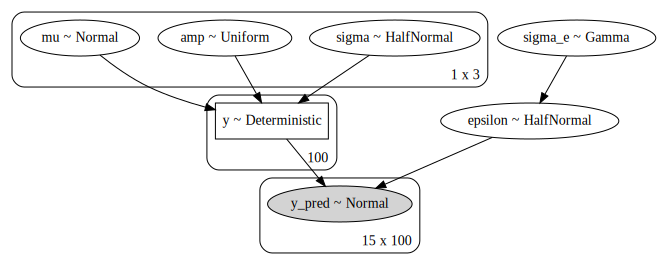

In [9]:
pm.model_to_graphviz(models[0])

In [10]:
# save model figure as image
img = pm.model_to_graphviz(models[0])
img.render(filename=file_basename + '_model', format='png');

# Collect results and save

In [11]:
# posterior predictive traces
ppc = [pm.sample_posterior_predictive(traces[i], samples=500, model=models[i]) for i in range(len(traces))]

/home/johan/VirtualEnv/ppsda/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 500/500 [00:01<00:00, 429.76it/s]
/home/johan/VirtualEnv/ppsda/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 500/500 [00:01<00:00, 440.96it/s]


In [12]:
varnames = ['amp', 'mu', 'sigma', 'epsilon']

# total dataset y-values, noise and run number list
ly_val = [val for run in range(nruns) for idx, val in enumerate(y_val)]
lnoise = [nl for run in range(nruns) for nl in noise_levels for i in range(nsets)]
lruns = ['{0}'.format(run+1) for run in range(nruns) for i in range(tsets)]

# collect the results and display
df = res.get_results_summary(varnames, traces, ppc, ly_val, epsilon_real=lnoise, runlist=lruns)
df

/home/johan/VirtualEnv/ppsda/lib/python3.6/site-packages/arviz/stats/stats.py:1126: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,run
1,1.603,13.3911,291.1,0.483631,0.819154,5454.641022,1.452013,0.05,1
2,1.056,2.5748,583.1,0.811940,0.905255,5397.346856,1.451346,0.05,1
3,2.650,0.0901,2.1,1.970679,0.999683,-4375.237549,0.062073,0.05,1
4,1.000,0.0000,3690.9,1.027842,0.999782,-3282.376501,0.080558,0.05,1
5,1.000,0.0037,3002.6,1.024956,0.981626,3402.565490,0.745640,0.05,1
...,...,...,...,...,...,...,...,...,...
86,1.785,1.1623,17.8,0.485588,0.887159,3211.484279,0.663659,0.25,3
87,1.248,3.6908,121.1,0.001977,0.513600,8604.478721,4.072607,0.25,3
88,1.397,0.0150,184.0,1.267165,0.997860,64.619724,0.246421,0.25,3
89,1.000,0.0026,3461.2,1.023083,0.911671,4596.548898,1.114469,0.25,3


In [13]:
# save results to .csv
df.to_csv(file_basename + '.csv', index=False)

In [14]:
fp = open(out_path + 'settings.txt', 'a')
fp.write('stop : ' + datetime.datetime.now().strftime("%A, %d. %B %Y %I:%M%p") + '\n')
fp.close()